# Поддержанные автомобили #
--------------------------------------------------------------------------------------------------------------------
### Бизнес-постановка задачи

Оценка подержанного автомобиля - это достаточно трудная задача, так как на стоимость влияют различные факторы, например, возраст автомобиля, его состояние, пробег и даже личное отношение продавца. Таким образом, цена подержанных автомобилей на рынке не является постоянной. И поскольку нет прозрачности в её образовании, а спрос растет ежегодно, у нечестных предпринимателей возникает стимул иррационально завышать цену. Модель для оценки стоимости подержанного автомобиля помогла бы покупателям не переплатить за желаемое авто, а честным продавцам быстро устанавливать цену, соответствующую их предложениям.
Датасет содержит информацию о характеристиках и ценах ряда подержанных автомобилей.

### Постановка задачи анализа данных

Целью данной задачи является прогнозирование цены на подержанные автомобили с помощью построения регрессионных и других моделей и их анализа.

## Описание данных
*Целевая переменная* (таргет) – **selling_price**: цена продажи, числовая.
### Признаки
- name(строка): модель автомобиля;
- year(числовое, целое): год выпуска с завода-изготовителя;
- km_driven(числовое, целое): пробег на продажу;
- fuel(категориальные: Дизельное топливо или Бензин , или КПГ , или СНГ , или электричество ): тип топлива;
- seller_type(категориальный: Частное лицо или Дилер , или Дилер Trustmark ): продавец;
- transmission(категория: Ручная или Автоматическая ): тип трансмиссии;
- owner(категориально: Первый владелец или Второй владелец , или Третий владелец , или Четвертый и выше владелец ): какой по счету хозяин?;
- mileage(строка, по смыслу числовой): пробег, требует предобработки;
- engine(строка, по смыслу числовой): рабочий объём двигателя, требует предобработки;
- max_power(строка, по смыслу числовой): пиковая мощность двигателя, требует предобработки;
- torque(строка, по смыслу числовой): крутящий момент, требует предобработки;
- seats(числовой, с плавающей запятой; по смыслу категориальный, int): число мест.

**Импорт необходимых библиотек**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

**Загрузим датасет**

In [3]:
df = pd.read_csv('cars.csv')

In [4]:
display(df)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.00
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.00
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.00
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.00
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.00
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.00
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.00


### Исследование данных
---------------------------------------------
#### Размер датасета

In [5]:
df.shape

(6999, 13)

#### Информация о типах данных и пропусках

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [7]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

Пропуски есть - будем от них избавляться.

Но сначала обработаем некоторые признаки.

#### Обработка признаков, содержащих пропуски

In [8]:
def treatment(column):
    df[column] = df[column].replace(r"\D",r'', regex=True)
    df[column] = df[column].replace("", np.nan, regex=True)
    df[column] = df[column].astype(float)

In [9]:
df['engine'] = df['engine'].replace(r"\D",r'', regex=True)
df['engine'] = df['engine'].replace("", np.nan, regex=True)
df['engine'] = df['engine'].astype(float)

In [10]:
df['mileage'] = df['mileage'].replace(r"\D",r'', regex=True)
df['mileage'] = df['mileage'].replace("", np.nan, regex=True)
df['mileage'] = df['mileage'].astype(float)

In [11]:
df['max_power'] = df['max_power'].replace(r"\D",r'', regex=True)
df['max_power'] = df['max_power'].replace("", np.nan, regex=True)
df['max_power'] = df['max_power'].astype(float)

In [12]:
df['torque'] = df['torque'].replace("\w*@ ",'', regex=True)
df['torque'] = df['torque'].replace("^ ",'', regex=True)
for i in range(df['torque'].shape[0]):
    if df['torque'][i] == np.nan:
        continue
    if type(df['torque'][i]) == float:
        continue
    if len(df['torque'][i]) < 9:
        continue
    df['torque'][i] = df['torque'][i].replace(df['torque'][i],df['torque'][i][-9:])
df['torque'] = df['torque'].replace("0-",'', regex=True)
df['torque'] = df['torque'].replace("rpm",'', regex=True)
df['torque'] = df['torque'].replace("()",'', regex=True)
df['torque'] = df['torque'].replace(" ",'', regex=True)
for i in range(df['torque'].shape[0]):
    if type(df['torque'][i]) == float:
        continue
    if len(df['torque'][i]) != 4:
        df['torque'][i] = np.nan
df['torque'] = df['torque'].astype(float)

C:\Users\ardat\AppData\Local\Temp\ipykernel_10584\1078894625.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['torque'][i] = df['torque'][i].replace(df['torque'][i],df['torque'][i][-9:])
C:\Users\ardat\AppData\Local\Temp\ipykernel_10584\1078894625.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['torque'][i] = df['torque'][i].replace(df['torque'][i],df['torque'][i][-9:])
C:\Users\ardat\AppData\Local\Temp\ipykernel_10584\1078894625.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [13]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,234.00,1248.00,74.00,2000.00,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,2114.00,1498.00,10352.00,2500.00,5.00
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,230.00,1396.00,90.00,2750.00,5.00
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,161.00,1298.00,882.00,NaN,5.00
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,2014.00,1197.00,8186.00,NaN,5.00


#### Размер датасета после удаления дубликатов

In [14]:
df.drop_duplicates(inplace = True)
df.shape

(6014, 13)

In [15]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,234.00,1248.00,74.00,2000.00,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,2114.00,1498.00,10352.00,2500.00,5.00
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,230.00,1396.00,90.00,2750.00,5.00
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,161.00,1298.00,882.00,NaN,5.00
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,2014.00,1197.00,8186.00,NaN,5.00


In [16]:
df.isna().sum()

name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage           190
engine            190
max_power         188
torque           1242
seats             190
dtype: int64

#### Заполнение пропусков

Так как пропусков мало (~3-4%) - их можно заменить медианным значением для:
1. mileage
1. engine        
1. max_power                 
1. seats 

In [17]:
df['mileage'].fillna(df['mileage'].median(), inplace=True)
df['engine'].fillna(df['engine'].median(), inplace=True)
df['max_power'].fillna(df['max_power'].median(), inplace=True)
df['seats'].fillna(df['seats'].median(), inplace=True)

#### Заполнение пропусков признака torque

После обработки данных в признаке torque - крутящий момент образовалось существенное количество пропусков (~20%).

Крутящий момент двигателя – это произведение силы на плечо рычага, к которому она приложена. Сила измеряется в Ньютонах, а плечо рычага - в метрах. Имеем, что 1 Нм равняется силе в 1Н (Ньютон), которая приложена к рычагу в 1 метр.

В двигателях внутреннего сгорания сила передается от топлива, которое воспламеняется, поршню, от поршня кривошипному механизму, от кривошипного механизма коленвалу. А вот уже коленвал через систему трансмиссии и приводов раскручивает колеса.

Понятно, что он не постоянен. Сильнее — когда на плечо действует большая сила, слабее — когда сила перестает действовать. То есть когда мы давим на педаль газа то сила, действующая на плечо увеличивается, а соответственно увеличивается и момент.

<!-- ![](meme.jpg) -->
<img src="Крутящий момент.jpg" alt="Drawing" style="width: 700px;"/>

Посмотрим на распределение данных крутящего момента

C:\Users\ardat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


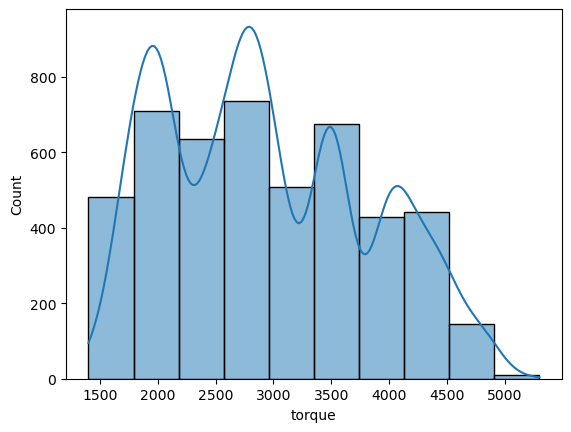

In [18]:
sns.histplot(df['torque'], bins=10, kde=True)
plt.show();

In [19]:
df['torque'].describe()

count   4772.00
mean    2946.40
std      876.36
min     1400.00
25%     2200.00
50%     2800.00
75%     3500.00
max     5300.00
Name: torque, dtype: float64

Большая часть данных находится в центре. Заменим пропуски средним значением.

In [20]:
df['torque'].fillna(df['torque'].mean().round(), inplace=True)

In [21]:
df.isna().sum().sum()

0

Наш датасет больше пропусков не имеет.

In [22]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,234.00,1248.00,74.00,2000.00,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,2114.00,1498.00,10352.00,2500.00,5.00
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,230.00,1396.00,90.00,2750.00,5.00
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,161.00,1298.00,882.00,2946.00,5.00
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,2014.00,1197.00,8186.00,2946.00,5.00


#### Основные числовые характеристики

In [23]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
count,6014.00,6014.00,6014.00,6014.00,6014.00,6014.00,6014.00,6014.00
mean,2013.45,521982.03,73764.15,920.06,1425.70,2479.45,2946.32,5.42
std,4.08,533842.62,59610.75,919.64,484.73,4841.58,780.62,0.98
min,1983.00,29999.00,1.00,0.00,624.00,0.00,1400.00,2.00
25%,2011.00,250000.00,39000.00,186.00,1197.00,99.00,2500.00,5.00
50%,2014.00,409999.00,70000.00,240.00,1248.00,671.00,2946.00,5.00
75%,2017.00,640000.00,100000.00,1934.00,1498.00,1381.00,3500.00,5.00
max,2020.00,10000000.00,2360457.00,3344.00,3604.00,108495.00,5300.00,14.00


#### Однофакторный анализ

Посмотрим на распределение цен

C:\Users\ardat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


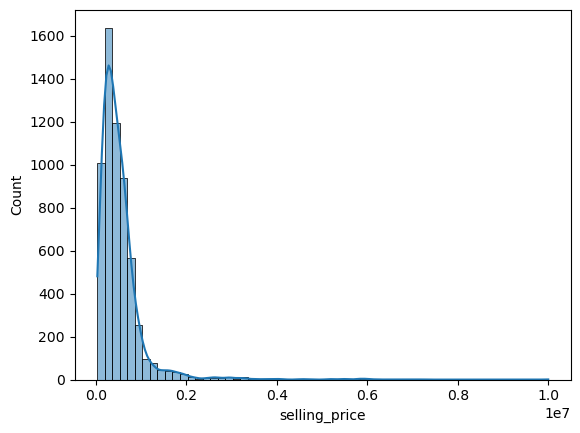

In [24]:
sns.histplot(df['selling_price'],bins=60, kde=True)
plt.show()

Посмотрим на корреляцию между признаками и целевой переменной. 

Коэффициент корреляции $\rho$ - это мера взаимосвязи между двумя величинами (корреляция Пирсона - мера линейной зависимости).

$-1 \leq \rho \leq 1$

Чем больше **по модулю** коэффициент корреляции $\rho$ - тем больше взаимосвязь между величинами.

#### Построим матрицу корреляций

<Axes: >

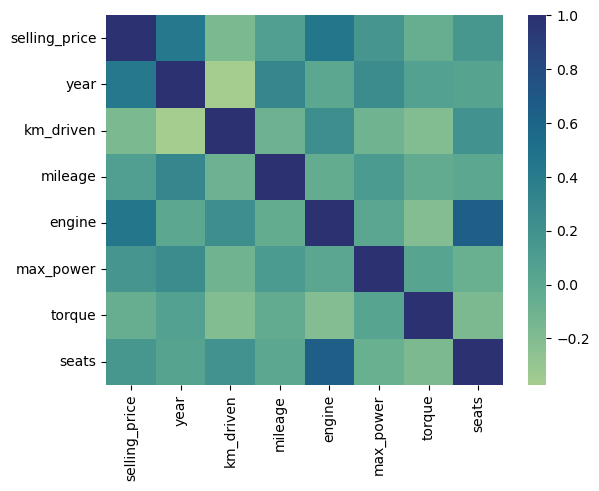

In [25]:
corr = df[['selling_price', 'year', 'km_driven', 'mileage','engine', 'max_power', 'torque', 'seats']].corr()
sns.heatmap(corr, cmap="crest")

In [26]:
corr.style.background_gradient(cmap='RdYlGn')

,selling_price,year,km_driven,mileage,engine,max_power,torque,seats
selling_price,1.000000,0.426674,-0.165215,0.077841,0.447281,0.160568,-0.066353,0.150927
year,0.426674,1.000000,-0.372163,0.293003,0.003560,0.248560,0.065250,0.043072
km_driven,-0.165215,-0.372163,1.000000,-0.090725,0.231840,-0.104510,-0.203096,0.191398
mileage,0.077841,0.293003,-0.090725,1.000000,-0.043544,0.114123,-0.031434,0.006323
engine,0.447281,0.003560,0.231840,-0.043544,1.000000,0.010565,-0.209004,0.651942
max_power,0.160568,0.248560,-0.104510,0.114123,0.010565,1.000000,0.040147,-0.074899
torque,-0.066353,0.065250,-0.203096,-0.031434,-0.209004,0.040147,1.000000,-0.172159
seats,0.150927,0.043072,0.191398,0.006323,0.651942,-0.074899,-0.172159,1.000000


С количественными признаками корреляция прослеживается следующая:
- есть слабая прямая связь цены и годом выпуска тс;
- есть слабая прямая связь цены и рабочим объёмом двигателя;
- есть прямая связь рабочим объёмом двигателя и количеством мест.

Посмотрим как влияют категориальные признаки на цену автомобиля

In [27]:
df_categori = df[['selling_price','name','fuel','seller_type','transmission','owner']].copy()

In [28]:
df_categori

,selling_price,name,fuel,seller_type,transmission,owner
0,450000,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
1,370000,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner
2,225000,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner
3,130000,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner
4,440000,Hyundai Xcent 1.2 VTVT E Plus,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...,...
6992,120000,Hyundai Santro Xing GLS,Petrol,Individual,Manual,First Owner
6993,260000,Maruti Wagon R VXI BS IV with ABS,Petrol,Individual,Manual,Second Owner
6994,320000,Hyundai i20 Magna,Petrol,Individual,Manual,First Owner
6995,135000,Hyundai Verna CRDi SX,Diesel,Individual,Manual,Fourth & Above Owner


In [29]:
df_categori.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,6014,6014,6014,6014,6014
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,107,3269,5394,5505,3721


Наша трансмиссия всего двух видов - сделаем из нее бинарный признак, где:
- 0 - РКПП
- 1 - АКПП

#### Кодирование признака transmission

In [30]:
df_categori['transmission'] = np.where(df_categori['transmission'] == 'Manual', 0, 1)

#### Кодирование признаков fuel, seller_type, owner

In [31]:
from sklearn.preprocessing import OrdinalEncoder
 
ordinalencoder = OrdinalEncoder(categories = [['Test Drive Car',
                                               'First Owner',
                                               'Second Owner',
                                               'Third Owner',
                                               'Fourth & Above Owner']])
 

# используем метод .to_frame() для преобразования Series в датафрейм
df_categori.loc[:, 'owner'] = ordinalencoder.fit_transform(df_categori.loc[:, 'owner'].to_frame())
df_categori.head()

,selling_price,name,fuel,seller_type,transmission,owner
0,450000,Maruti Swift Dzire VDI,Diesel,Individual,0,1.00
1,370000,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,0,2.00
2,225000,Hyundai i20 Sportz Diesel,Diesel,Individual,0,1.00
3,130000,Maruti Swift VXI BSIII,Petrol,Individual,0,1.00
4,440000,Hyundai Xcent 1.2 VTVT E Plus,Petrol,Individual,0,1.00


In [32]:
# ключами будут старые значения признака
# значениями словаря - новые значения признака
map_dict_fuel = {'Diesel' : 0,
            'Petrol' : 1,
            'CNG': 2,
           'LPG': 3
           }
 
df_categori['fuel'] = df_categori['fuel'].map(map_dict_fuel)

In [33]:
map_dict_seller = {'Individual': 0,
                  'Dealer': 1,
                  'Trustmark Dealer': 2
                  }
df_categori['seller_type'] = df_categori['seller_type'].map(map_dict_seller)

<Axes: >

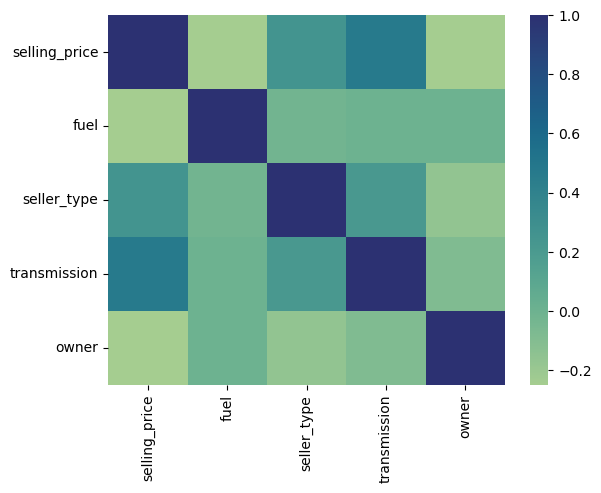

In [34]:
corr_categori= df_categori[['selling_price','fuel','seller_type','transmission','owner']].corr()
sns.heatmap(corr_categori, cmap="crest")

In [35]:
corr_categori.style.background_gradient(cmap='RdYlGn')

,selling_price,fuel,seller_type,transmission,owner
selling_price,1.000000,-0.247296,0.255963,0.469772,-0.249651
fuel,-0.247296,1.000000,-0.020847,0.002837,-0.000039
seller_type,0.255963,-0.020847,1.000000,0.215580,-0.166560
transmission,0.469772,0.002837,0.215580,1.000000,-0.087428
owner,-0.249651,-0.000039,-0.166560,-0.087428,1.000000


После обработки категориальных признаков сделаем выводы по корреляции:
- есть слабая прямая связь цены и трансмиссией;
- есть слабая обратная связь цены и владельцем по счету.

### Создание новых признаков

#### Первый признак

Разделим все машины на две категории:
- выпущены с 2015 года или позже;
- выпущены раньше 2015 года.

In [36]:
df['year8'] = np.where(df['year']>= 2015, 1, 0)

In [37]:
df[['selling_price','year8']].corr().style.background_gradient(cmap='RdYlGn')

,selling_price,year8
selling_price,1.000000,0.383557
year8,0.383557,1.000000


Есть слабая прямая связь - чем машина моложе, тем цена выше.

#### Работа над  признаком name

In [38]:
name_df = df[['name','selling_price']].copy()

In [39]:
name_df.head()

,name,selling_price
0,Maruti Swift Dzire VDI,450000
1,Skoda Rapid 1.5 TDI Ambition,370000
2,Hyundai i20 Sportz Diesel,225000
3,Maruti Swift VXI BSIII,130000
4,Hyundai Xcent 1.2 VTVT E Plus,440000


In [40]:
def name_replace(k_dict):
    name_df['name'] = name_df['name'].replace(r" ", '', regex=True).replace(f"{k_dict}.*", f'{k_dict}', regex=True)
    return name_df['name']

Создадим словарь "бренд - страна производитель"

In [41]:
model_dict_country = {'Volvo' : 'Sweden',
                   'Volkswagen' : 'Germany',
                   'Mercedes-Benz' : 'Germany',
                   'BMW' : 'Germany',
                   'Audi' : 'Germany',
                   'Toyota' : 'Japan',
                   'Nissan' : 'Japan',
                   'Mitsubishi' : 'Japan',
                   'Isuzu' : 'Japan',
                   'Lexus' : 'Japan',
                   'Honda' : 'Japan',
                   'Datsun' : 'Japan',
                   'Tata' : 'India',
                   'Maruti' : 'India',
                   'Mahindra' : 'India',
                   'Ambassador' : 'India',
                   'Skoda' : 'Czech',
                   'Renault' : 'France',
                   'Peugeot' : 'France',
                   'Jeep' : 'USA',
                   'Ford' : 'USA',
                   'Chevrolet' : 'USA',
                   'Jaguar' : 'GB',
                   'Land' : 'GB',
                   'MG' : 'GB',
                   'Fiat' : 'Italy',
                   'Hyundai' : 'SK',
                   'Kia' : 'SK',
                   'Daewoo' : 'SK',
                   'Force' : 'Taiwan'  
                   }

In [42]:
for key in model_dict_country:
    name_replace(key)

In [43]:
name_df.head()

,name,selling_price
0,Maruti,450000
1,Skoda,370000
2,Hyundai,225000
3,Maruti,130000
4,Hyundai,440000


In [44]:
name_df.isna().sum()

name             0
selling_price    0
dtype: int64

In [45]:
map_dict_country = {'Sweden' : 10,
                   'GB' : 9,
                   'Germany' : 8,
                   'Japan' : 7,
                   'Taiwan' : 6,
                   'USA' : 5,
                   'Czech' : 4,
                   'France' : 3,
                   'SK' : 2,
                   'India' : 1,
                   'Italy' : 0
                   } 
name_df['country'] = name_df['name'].map(model_dict_country)                   

In [46]:
name_df.head()

,name,selling_price,country
0,Maruti,450000,India
1,Skoda,370000,Czech
2,Hyundai,225000,SK
3,Maruti,130000,India
4,Hyundai,440000,SK


In [47]:
name_df['country_number'] = name_df['country'].map(map_dict_country)   

In [48]:
name_df.head()

,name,selling_price,country,country_number
0,Maruti,450000,India,1
1,Skoda,370000,Czech,4
2,Hyundai,225000,SK,2
3,Maruti,130000,India,1
4,Hyundai,440000,SK,2


In [49]:
name_df[['selling_price','country_number']].corr().style.background_gradient(cmap='RdYlGn')

,selling_price,country_number
selling_price,1.000000,0.339551
country_number,0.339551,1.000000


Есть слабая прямая связь - цена зависит от страны производителя

Закодируем переменную name

In [50]:
from sklearn.preprocessing import LabelEncoder 
labelencoder = LabelEncoder()
name_df.loc[:, 'name'] = labelencoder.fit_transform(name_df.loc[:, 'name'])
name_df.head()

,name,selling_price,country,country_number
0,19,450000,India,1
1,25,370000,Czech,4
2,10,225000,SK,2
3,19,130000,India,1
4,10,440000,SK,2


In [51]:
name_df[['selling_price','name']].corr().style.background_gradient(cmap='RdYlGn')

,selling_price,name
selling_price,1.000000,-0.047050
name,-0.047050,1.000000


Так как мы разделили автомобили по маркам выявить связь не удалось - действительного, у одного производителя могут быть автомобили различного ценнового диапазона

#### Какие таблицы имеем на выходе?!

 До данного этапа использовалось три таблицу.
 
 Преобразуем их и сведем в будущем в одну

In [52]:
df_categori_ml = df_categori[['fuel', 'seller_type', 'transmission', 'owner']].copy()
df_categori_ml.head()

,fuel,seller_type,transmission,owner
0,0,0,0,1.00
1,0,0,0,2.00
2,0,0,0,1.00
3,1,0,0,1.00
4,1,0,0,1.00


In [53]:
df_on_ml = df[['year', 'selling_price', 'km_driven', 'mileage', 'max_power', 'torque', 'seats', 'year8' ]].copy()
df_on_ml.head()

,year,selling_price,km_driven,mileage,max_power,torque,seats,year8
0,2014,450000,145500,234.00,74.00,2000.00,5.00,0
1,2014,370000,120000,2114.00,10352.00,2500.00,5.00,0
2,2010,225000,127000,230.00,90.00,2750.00,5.00,0
3,2007,130000,120000,161.00,882.00,2946.00,5.00,0
4,2017,440000,45000,2014.00,8186.00,2946.00,5.00,1


In [54]:
name_df_ml = name_df[['name', 'country_number']].copy()
name_df_ml = name_df_ml.rename(columns={'name': 'name_number'})
name_df_ml.head()

,name_number,country_number
0,19,1
1,25,4
2,10,2
3,19,1
4,10,2


Объединяем таблицы

In [55]:
df_ml = pd.concat([
    df_on_ml,
    df_categori_ml,
    name_df_ml],
    axis=1)

Итоговая таблица

In [56]:
df_ml

,year,selling_price,km_driven,mileage,max_power,torque,seats,year8,fuel,seller_type,transmission,owner,name_number,country_number
0,2014,450000,145500,234.00,74.00,2000.00,5.00,0,0,0,0,1.00,19,1
1,2014,370000,120000,2114.00,10352.00,2500.00,5.00,0,0,0,0,2.00,25,4
2,2010,225000,127000,230.00,90.00,2750.00,5.00,0,0,0,0,1.00,10,2
3,2007,130000,120000,161.00,882.00,2946.00,5.00,0,1,0,0,1.00,19,1
4,2017,440000,45000,2014.00,8186.00,2946.00,5.00,1,1,0,0,1.00,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,2008,120000,191000,1792.00,621.00,2946.00,5.00,0,1,0,0,1.00,10,2
6993,2013,260000,50000,189.00,671.00,3500.00,5.00,0,1,0,0,2.00,19,1
6994,2013,320000,110000,185.00,8285.00,2946.00,5.00,0,1,0,0,1.00,10,2
6995,2007,135000,119000,168.00,110.00,2946.00,5.00,0,0,0,0,4.00,10,2


#### Анализ по топливу 

Посмотрим простую гистограмму по полу

<Axes: xlabel='fuel', ylabel='count'>

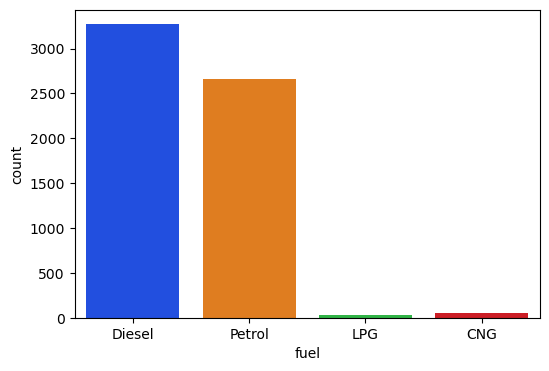

In [57]:
plt.figure(figsize=(6,4))

sns.countplot(x='fuel', data = df, palette='bright')

Визуализируем связь средней цены автомобиля в зависимости от вида потребляемого топлива. На гистограмме изображены для каждой категории:

* средняя цена
* доверительный интервал для среднего с вероятностью 95%

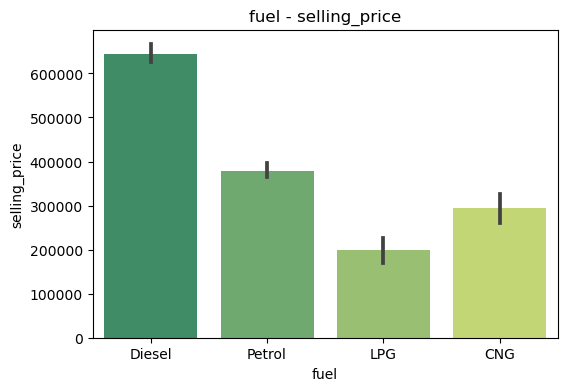

In [58]:
plt.figure(figsize=(6,4))

sns.barplot(x='fuel', y='selling_price', data = df, palette='summer')
plt.title('fuel - selling_price')
plt.show()

In [59]:
df[['selling_price', 'fuel']].groupby(['fuel']).mean()

,selling_price
fuel,
CNG,294078.37
Diesel,644781.37
LPG,198411.76
Petrol,379573.54


Посмотри распределение машин по странам

<Axes: >

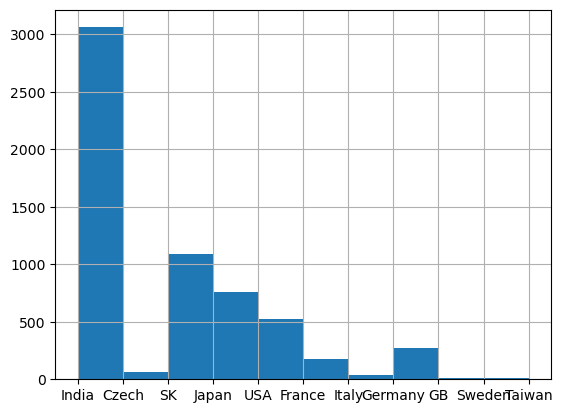

In [60]:
name_df['country'].hist()

Визуализируем связь средней цены автомобиля в зависимости отстраны производителя. На гистограмме изображены для каждой категории:

- средняя цена
- доверительный интервал для среднего с вероятностью 95%

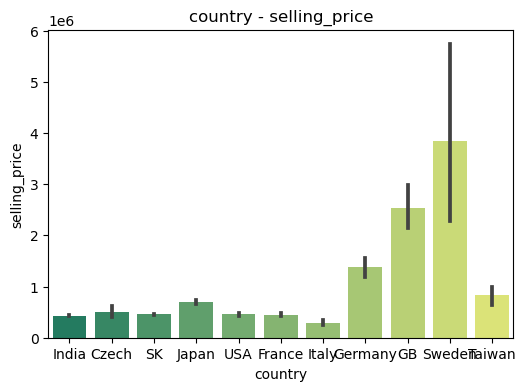

In [61]:
plt.figure(figsize=(6,4))

sns.barplot(x='country', y='selling_price', data = name_df, palette='summer')
plt.title('country - selling_price')
plt.show()

Добавим **третий** новый признак по пробегу.

Будем считать, что пробег является нормальным, если он не более 75000 км

In [62]:
df_ml['km_dr_ok'] = np.where(df_ml['km_driven'] <= 75000, 1, 0)

In [63]:
df_ml.head()

,year,selling_price,km_driven,mileage,max_power,torque,seats,year8,fuel,seller_type,transmission,owner,name_number,country_number,km_dr_ok
0,2014,450000,145500,234.00,74.00,2000.00,5.00,0,0,0,0,1.00,19,1,0
1,2014,370000,120000,2114.00,10352.00,2500.00,5.00,0,0,0,0,2.00,25,4,0
2,2010,225000,127000,230.00,90.00,2750.00,5.00,0,0,0,0,1.00,10,2,0
3,2007,130000,120000,161.00,882.00,2946.00,5.00,0,1,0,0,1.00,19,1,0
4,2017,440000,45000,2014.00,8186.00,2946.00,5.00,1,1,0,0,1.00,10,2,1


In [64]:
df_ml = df_ml.reset_index()

In [65]:
df_ml.head()

,index,year,selling_price,km_driven,mileage,max_power,torque,seats,year8,fuel,seller_type,transmission,owner,name_number,country_number,km_dr_ok
0,0,2014,450000,145500,234.00,74.00,2000.00,5.00,0,0,0,0,1.00,19,1,0
1,1,2014,370000,120000,2114.00,10352.00,2500.00,5.00,0,0,0,0,2.00,25,4,0
2,2,2010,225000,127000,230.00,90.00,2750.00,5.00,0,0,0,0,1.00,10,2,0
3,3,2007,130000,120000,161.00,882.00,2946.00,5.00,0,1,0,0,1.00,19,1,0
4,4,2017,440000,45000,2014.00,8186.00,2946.00,5.00,1,1,0,0,1.00,10,2,1


In [66]:
df_ml.drop('index', axis= 1, inplace= True)

In [67]:
df_ml.head()

,year,selling_price,km_driven,mileage,max_power,torque,seats,year8,fuel,seller_type,transmission,owner,name_number,country_number,km_dr_ok
0,2014,450000,145500,234.00,74.00,2000.00,5.00,0,0,0,0,1.00,19,1,0
1,2014,370000,120000,2114.00,10352.00,2500.00,5.00,0,0,0,0,2.00,25,4,0
2,2010,225000,127000,230.00,90.00,2750.00,5.00,0,0,0,0,1.00,10,2,0
3,2007,130000,120000,161.00,882.00,2946.00,5.00,0,1,0,0,1.00,19,1,0
4,2017,440000,45000,2014.00,8186.00,2946.00,5.00,1,1,0,0,1.00,10,2,1


In [68]:
df_ml.corr().style.background_gradient(cmap='RdYlGn')

,year,selling_price,km_driven,mileage,max_power,torque,seats,year8,fuel,seller_type,transmission,owner,name_number,country_number,km_dr_ok
year,1.000000,0.426674,-0.372163,0.293003,0.248560,0.065250,0.043072,0.774389,-0.074117,0.151291,0.140614,-0.495271,-0.019426,0.052575,0.411233
selling_price,0.426674,1.000000,-0.165215,0.077841,0.160568,-0.066353,0.150927,0.383557,-0.247296,0.255963,0.469772,-0.249651,-0.047050,0.339551,0.194685
km_driven,-0.372163,-0.165215,1.000000,-0.090725,-0.104510,-0.203096,0.191398,-0.382396,-0.236491,-0.130081,-0.120653,0.260758,0.093490,0.025659,-0.625711
mileage,0.293003,0.077841,-0.090725,1.000000,0.114123,-0.031434,0.006323,0.242242,-0.084304,0.004980,0.008413,-0.145129,0.153199,0.026227,0.084593
max_power,0.248560,0.160568,-0.104510,0.114123,1.000000,0.040147,-0.074899,0.206490,-0.015552,0.107435,0.094318,-0.135960,-0.043365,0.051932,0.113963
torque,0.065250,-0.066353,-0.203096,-0.031434,0.040147,1.000000,-0.172159,0.126817,0.630218,0.057110,0.116936,-0.064529,-0.024155,0.113200,0.223233
seats,0.043072,0.150927,0.191398,0.006323,-0.074899,-0.172159,1.000000,-0.014131,-0.335043,-0.041800,-0.019369,-0.000393,0.151353,-0.014395,-0.175301
year8,0.774389,0.383557,-0.382396,0.242242,0.206490,0.126817,-0.014131,1.000000,0.025554,0.131270,0.140460,-0.422805,-0.032902,0.015324,0.435693
fuel,-0.074117,-0.247296,-0.236491,-0.084304,-0.015552,0.630218,-0.335043,0.025554,1.000000,-0.020847,0.002837,-0.000039,-0.133100,-0.102711,0.269922
seller_type,0.151291,0.255963,-0.130081,0.004980,0.107435,0.057110,-0.041800,0.131270,-0.020847,1.000000,0.215580,-0.166560,-0.053713,0.182886,0.165918


## Машинное обучение

### Предсказание цены автомобиля `selling_price`

![](https://raw.githubusercontent.com/MerkulovDaniil/TensorFlow_and_Keras_crash_course/master/ford_price.png)

#### Разбиение датасета на:
- матрицу X, содержащую все признаки, и не содержащую целевую переменную `selling_price`;
- вектор y (target), содержащий целевую переменную `selling_price`.

In [69]:
target = df_ml['selling_price'].copy()

In [70]:
matr_X = df_ml.drop(columns=["selling_price"])

Разделим выборку на тренировочную и тестовую. Долю тестовой выборки укажем равной 0.25.

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(matr_X, target, test_size = 0.25, random_state = 42)
X_train.shape, X_test.shape

((4510, 14), (1504, 14))

**Выбираем модели, который будем использовать**

Проще всего начать с простых методов. 
Мы воспользуемся двумя методами для построения моделей без масштабирования признаков:
* Линейная регрессия *linear regression*
* Ridge — линейная регрессия с оптимизацией MSE и  ℓ2-регуляризацией
* Лес решающих деревьев *random forest*

На выбор метода для построения модели влияет набор признаков, размер выборки, интуиция про то, какая связь между входными переменными и целевой. Но часто решение принимается исходя из того, какая модель сработала лучше.

In [72]:
from sklearn import linear_model, ensemble

#### Создаем модели

In [73]:
linear_regression_model = linear_model.LinearRegression()
linear_regression_ridge_model = linear_model.Ridge()
random_forest_model = ensemble.RandomForestRegressor(random_state=123)

#### Обучаем модели

In [74]:
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [75]:
linear_regression_ridge_model.fit(X_train, y_train)

Ridge()

In [76]:
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

* Для двух разных моделей в sklearn методы для обучения модели не отличаются.
* Мы получили две обученные модели. 
* Теперь необходимо провалидировать модели на новых тестовых данных. 

**Какая модель лучше?**

Получим прогнозы целевой переменной на тестовых данных для модели линейной регрессии м модели случайного леса. 

Для этого вызовем у каждой модели метод **predict()**, в качестве аргумента передадим `X_train`.

In [77]:
test_predictions_linear = linear_regression_model.predict(X_test)
test_predictions_ridge_model = linear_regression_ridge_model.predict(X_test)
test_predictions_random_forest = random_forest_model.predict(X_test)

Качество регрессионных моделей оценим двумя способами:

1. Сравним визуально прогнозы с настоящими ценами (тестовые с предсказанием);
2. Сравним метрики качества

#### Визуализируем прогноз линейной модели и настоящие значения из тестовой выборки

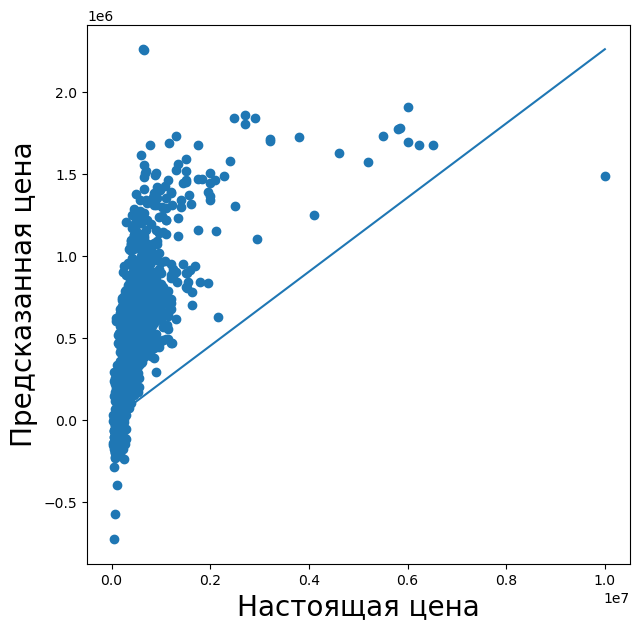

In [78]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(y_test)], [0, max(test_predictions_linear)])  # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

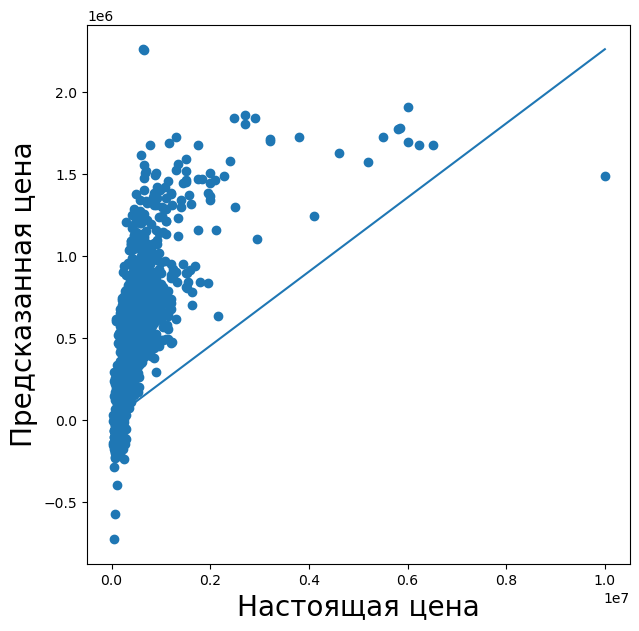

In [79]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, test_predictions_ridge_model) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(y_test)], [0, max(test_predictions_ridge_model)])  # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

#### Визуализируем прогноз модели случайного леса и настоящие значения из тестовой выборки

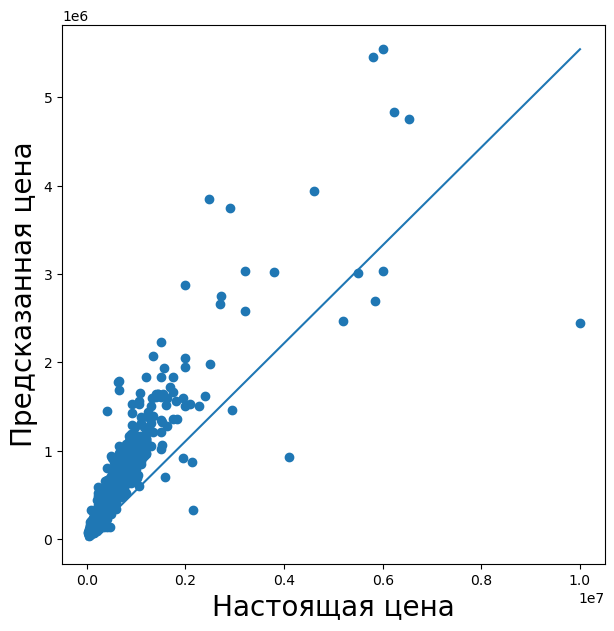

In [80]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, test_predictions_random_forest) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(y_test)], [0, max(test_predictions_random_forest)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

Кажется, что лучше сработала модель случайного леса, так как точки на втором изображении расположены вдоль диагонали.

Проверим, так ли это с помощью **метрик качества регрессионной модели**

Для корректного подсчета метрик качества модели в python требуется загрузить их из библиотеки sklearn.

Мы используем две метрики качества:

- mean_absolute_error - средняя абсолютная ошибка;
- mean_squared_error - средняя квадратичная ошибка;
- RMSE - корень из mean_squared_error;
- Коэффициент детерминации.

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Подсчитаем ошибки для линейной модели.

Для этого вызовем методы **mean_absolute_error()** и **mean_squared_error()**. На вход им передается столбец настоящих значений `y_test` и столбец значений, предсказанных моделью линейной регрессии `test_predictions_linear`.

In [82]:
mean_absolute_error_linear_model = mean_absolute_error(y_test, test_predictions_linear)
mean_squared_error_linear_model = mean_squared_error(y_test, test_predictions_linear)
r2_score_linear_model = r2_score(y_test, test_predictions_linear)

In [83]:
mean_absolute_error_linear_ridge_model = mean_absolute_error(y_test, test_predictions_ridge_model)
mean_squared_error_linear_ridge_model = mean_squared_error(y_test, test_predictions_ridge_model)
r2_score_linear_ridge_model = r2_score(y_test, test_predictions_ridge_model)

#### Подсчитаем ошибки для модели случайного леса.

Для этого вызовем методы **mean_absolute_error()** и **mean_squared_error()**. На вход им передается столбец настоящих значений `y_test` и столбец значений, предсказанных моделью линейной регрессии `test_predictions_random_forest`.

In [84]:
mean_absolute_error_random_forest_model = mean_absolute_error(y_test, test_predictions_random_forest)
mean_squared_error_random_forest_model = mean_squared_error(y_test, test_predictions_random_forest)
r2_score_random_forest_model = r2_score(y_test, test_predictions_random_forest)

#### Теперь напечатаем полученные ошибки.

In [85]:
print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for linear model".format(
        mean_absolute_error(y_test, test_predictions_linear), 
        mean_squared_error(y_test, test_predictions_linear)**0.5,
        r2_score_linear_model))

print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for linear ridge model".format(
        mean_absolute_error(y_test, test_predictions_ridge_model), 
        mean_squared_error(y_test, test_predictions_ridge_model)**0.5,
        r2_score_linear_ridge_model))


print("MAE: {0:7.2f}, RMSE: {1:7.2f},  R2: {2:7.2f} for random forest model".format(
       mean_absolute_error(y_test, test_predictions_random_forest), 
       mean_squared_error(y_test, test_predictions_random_forest)**0.5,
       r2_score_random_forest_model))

MAE: 219530.03, RMSE: 480475.92, R2:    0.39 for linear model
MAE: 219476.45, RMSE: 480489.60, R2:    0.39 for linear ridge model
MAE: 101267.58, RMSE: 308156.06,  R2:    0.75 for random forest model


Модель случайного леса работает лучше и визуально, и потому, что абсолютная и средне квадратичная ошибка меньше для линейной регресии.

Мы получили значения метрик ошибок наших моделей. Чтобы понять, насколько это нас утсраивает, важно взглянуть на исходный порядок цен на автомобили.
Видно, что средняя цена имеет 521982 единиц, что означает, что полученная ошибка не может удовлетворять предъявляемым требованиям к модели регрессии.

Возможно следует дробить датасет на "куски" по маркам машин, и для каждо отдельной предсказывать цену.

### Попытка улучшить модель

#### Отмасштабируем вещественные признаки

In [86]:
X_train

,year,km_driven,mileage,max_power,torque,seats,year8,fuel,seller_type,transmission,owner,name_number,country_number,km_dr_ok
5845,2017,45500,239.00,1262.00,2750.00,5.00,1,0,0,0,2.00,10,2,1
2458,2014,80000,211.00,552.00,2946.00,5.00,0,1,0,0,3.00,10,2,0
2522,2016,69500,1299.00,1006.00,3600.00,8.00,1,0,0,0,2.00,27,7,1
2410,2017,50000,2166.00,10862.00,3000.00,5.00,1,0,0,0,1.00,28,8,1
3706,2016,70000,2809.00,885.00,1750.00,5.00,1,0,0,0,1.00,19,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,2012,77000,2232.00,12632.00,2750.00,5.00,0,0,0,0,1.00,10,2,0
5191,2008,120000,181.00,110.00,2946.00,5.00,0,0,0,0,2.00,10,2,0
5226,2019,3000,2014.00,8186.00,2946.00,5.00,1,1,0,0,1.00,10,2,1
5390,2009,220000,128.00,102.00,2946.00,8.00,0,0,0,0,1.00,27,7,0


In [87]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = pd.DataFrame(ss.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns = X_test.columns)
X_train.head()

,year,km_driven,mileage,max_power,torque,seats,year8,fuel,seller_type,transmission,owner,name_number,country_number,km_dr_ok
0,0.88,-0.46,-0.75,-0.26,-0.23,-0.44,1.08,-0.86,-0.33,-0.30,0.67,-0.99,-0.30,0.88
1,0.15,0.08,-0.78,-0.43,0.02,-0.44,-0.92,0.98,-0.33,-0.30,2.03,-0.99,-0.30,-1.14
2,0.64,-0.08,0.40,-0.32,0.86,2.61,1.08,-0.86,-0.33,-0.30,0.67,1.48,1.76,0.88
3,0.88,-0.39,1.34,1.94,0.09,-0.44,1.08,-0.86,-0.33,-0.30,-0.69,1.62,2.17,0.88
4,0.64,-0.08,2.04,-0.35,-1.52,-0.44,1.08,-0.86,-0.33,-0.30,-0.69,0.32,-0.71,0.88


Повторим все действия, что были раннее

In [88]:
linear_regression_model = linear_model.LinearRegression()
random_forest_model = ensemble.RandomForestRegressor(random_state=123)

In [89]:
linear_regression_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [90]:
test_predictions_linear = linear_regression_model.predict(X_test)
test_predictions_random_forest = random_forest_model.predict(X_test)

In [91]:
mean_absolute_error_linear_model = mean_absolute_error(y_test, test_predictions_linear)
mean_squared_error_linear_model = mean_squared_error(y_test, test_predictions_linear)
r2_score_linear_model = r2_score(y_test, test_predictions_linear)

In [92]:
mean_absolute_error_random_forest_model = mean_absolute_error(y_test, test_predictions_random_forest)
mean_squared_error_random_forest_model = mean_squared_error(y_test, test_predictions_random_forest)
r2_score_random_forest_model = r2_score(y_test, test_predictions_random_forest)

In [93]:
print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for linear model".format(
        mean_absolute_error(y_test, test_predictions_linear), 
        mean_squared_error(y_test, test_predictions_linear)**0.5,
        r2_score_linear_model))

print("MAE: {0:7.2f}, RMSE: {1:7.2f},  R2: {2:7.2f} for random forest model".format(
       mean_absolute_error(y_test, test_predictions_random_forest), 
       mean_squared_error(y_test, test_predictions_random_forest)**0.5,
       r2_score_random_forest_model))

MAE: 219530.03, RMSE: 480475.92, R2:    0.39 for linear model
MAE: 101212.93, RMSE: 308034.24,  R2:    0.75 for random forest model


Улучшения есть, но не значительны.

### Подбор гиперпараметров модели

In [94]:
from sklearn.model_selection import GridSearchCV

Так как случайный лес показал лучшее качество на метриках, будем пытаться улучшить ее.

У модели на основе случайного леса большое количество параметров. Рассмотрим наиболее важные:
* параметр *n_estimators* определяет, сколько деревьев в лесу,
* в параметре *max_depth* устанавливается, какая максимальная глубина у дерева,
* в параметре *min_samples_leaf* задается, какое максимальное число объектов может попасть в лист дерева.

In [95]:
clf_rf = ensemble.RandomForestRegressor(n_estimators = 100, random_state=123)

In [96]:
parametrs_rf = {'max_depth': range(1,16),
                'min_samples_leaf': range(1,16),
               }

rf_clf = GridSearchCV(clf_rf,
                   parametrs_rf,
                   scoring = 'r2',
                   n_jobs=-1,
                   cv=5)
rf_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': range(1, 16),
                         'min_samples_leaf': range(1, 16)},
             scoring='r2')

In [97]:
rf_clf.best_params_ 

{'max_depth': 15, 'min_samples_leaf': 1}

Посмотрим качество

In [98]:
from sklearn.model_selection import cross_val_score

In [99]:
clf_quality = cross_val_score(rf_clf,
                             X_train,
                             y_train,
                             scoring = 'r2',
                             n_jobs=-1,
                             cv = 5,
                             error_score = 'raise')

In [100]:
clf_quality.mean()

0.8764448322187868

Обучим модель на лучших подобранных гиперпараметрах

In [101]:
clf_model_rf = ensemble.RandomForestRegressor(n_estimators = 100,
                                              random_state=123,
                                              max_depth = rf_clf.best_params_['max_depth'],
                                              min_samples_leaf = rf_clf.best_params_['min_samples_leaf'])

clf_model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, random_state=123)

In [102]:
test_predictions_rf = clf_model_rf.predict(X_test)

In [103]:
mean_absolute_error_random_forest_model = mean_absolute_error(y_test, test_predictions_rf)
mean_squared_error_random_forest_model = mean_squared_error(y_test, test_predictions_rf)
r2_score_random_forest_model = r2_score(y_test, test_predictions_rf)

In [104]:
print("MAE: {0:7.2f}, RMSE: {1:7.2f},  R2: {2:7.2f} for random forest model".format(
       mean_absolute_error(y_test, test_predictions_rf), 
       mean_squared_error(y_test, test_predictions_rf)**0.5,
       r2_score_random_forest_model))

MAE: 99767.97, RMSE: 305817.83,  R2:    0.75 for random forest model


Небольшое улучшение есть.

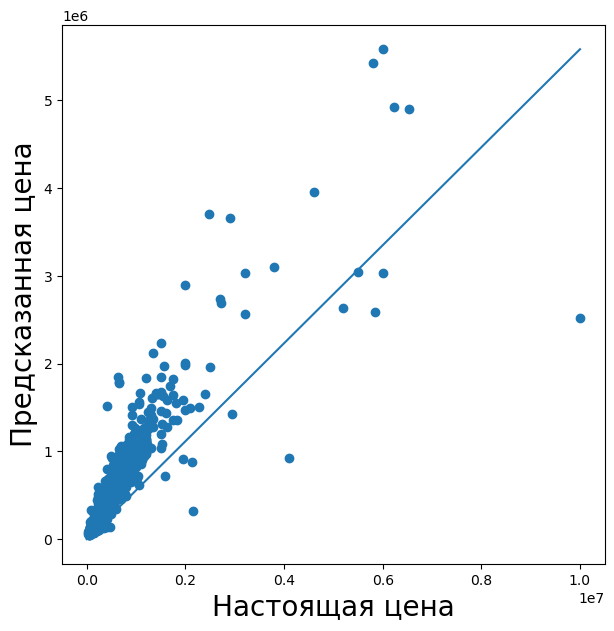

In [105]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, test_predictions_rf) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(y_test)], [0, max(test_predictions_rf)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

Качество данной модели нельзя назвать удовлетворительным. Будем пробовать дальше!

#### Посмотрим на веса модели

In [106]:
importances = pd.DataFrame({'weights': linear_regression_model.coef_[0],
                            'features': X_train.columns}).sort_values(by='weights')
importances

,weights,features
0,94348.87,year
1,94348.87,km_driven
2,94348.87,mileage
3,94348.87,max_power
4,94348.87,torque
5,94348.87,seats
6,94348.87,year8
7,94348.87,fuel
8,94348.87,seller_type
9,94348.87,transmission


Попробуем закодировать категориальные переменные верно - используя "one hot"

In [107]:
matr_X.head()

,year,km_driven,mileage,max_power,torque,seats,year8,fuel,seller_type,transmission,owner,name_number,country_number,km_dr_ok
0,2014,145500,234.00,74.00,2000.00,5.00,0,0,0,0,1.00,19,1,0
1,2014,120000,2114.00,10352.00,2500.00,5.00,0,0,0,0,2.00,25,4,0
2,2010,127000,230.00,90.00,2750.00,5.00,0,0,0,0,1.00,10,2,0
3,2007,120000,161.00,882.00,2946.00,5.00,0,1,0,0,1.00,19,1,0
4,2017,45000,2014.00,8186.00,2946.00,5.00,1,1,0,0,1.00,10,2,1


In [108]:
matr_X['owner'].value_counts()

owner
1.0    3721
2.0    1691
3.0     457
4.0     141
0.0       4
Name: count, dtype: int64

In [109]:
matr_X2 = matr_X.copy()
matr_X2 = pd.get_dummies(matr_X2, columns = ['fuel','seller_type','owner','name_number','country_number'], drop_first = True)

In [110]:
matr_X2.head()

,year,km_driven,mileage,max_power,torque,seats,year8,transmission,km_dr_ok,fuel_1,...,country_number_1,country_number_2,country_number_3,country_number_4,country_number_5,country_number_6,country_number_7,country_number_8,country_number_9,country_number_10
0,2014,145500,234.00,74.00,2000.00,5.00,0,0,0,False,...,True,False,False,False,False,False,False,False,False,False
1,2014,120000,2114.00,10352.00,2500.00,5.00,0,0,0,False,...,False,False,False,True,False,False,False,False,False,False
2,2010,127000,230.00,90.00,2750.00,5.00,0,0,0,False,...,False,True,False,False,False,False,False,False,False,False
3,2007,120000,161.00,882.00,2946.00,5.00,0,0,0,True,...,True,False,False,False,False,False,False,False,False,False
4,2017,45000,2014.00,8186.00,2946.00,5.00,1,0,1,True,...,False,True,False,False,False,False,False,False,False,False


In [111]:
X_train, X_test, y_train, y_test = train_test_split(matr_X2, target, test_size = 0.25, random_state = 42)
X_train.shape, X_test.shape

((4510, 57), (1504, 57))

In [112]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
ss.fit(X_train) # вычислить min, max по каждому столбцу

X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

X_train.head()

,year,km_driven,mileage,max_power,torque,seats,year8,transmission,km_dr_ok,fuel_1,...,country_number_1,country_number_2,country_number_3,country_number_4,country_number_5,country_number_6,country_number_7,country_number_8,country_number_9,country_number_10
0,0.92,0.02,0.07,0.01,0.35,0.38,1.00,0.00,1.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.84,0.03,0.06,0.01,0.40,0.38,0.00,0.00,0.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.89,0.03,0.39,0.01,0.56,0.75,1.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3,0.92,0.02,0.65,0.10,0.41,0.38,1.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,0.89,0.03,0.84,0.01,0.09,0.38,1.00,0.00,1.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Сделаем линейную модель

In [113]:
model_lr = linear_model.LinearRegression()

In [114]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [115]:
test_model_lr = model_lr.predict(X_test)

In [116]:
MAE_model = mean_absolute_error(y_test, test_model_lr)
MRSE_model = mean_squared_error(y_test, test_model_lr)
r2_model = r2_score(y_test, test_model_lr)

In [117]:
print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for linear model".format(
        MAE_model, 
        MRSE_model**0.5,
        r2_model))

MAE: 169831.14, RMSE: 381993.09, R2:    0.61 for linear model


Слишком высокая ошибка

In [118]:
model_rf = ensemble.RandomForestRegressor(n_estimators = 100,
                                              random_state=123,
                                              max_depth = rf_clf.best_params_['max_depth'],
                                              min_samples_leaf = rf_clf.best_params_['min_samples_leaf'])

model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, random_state=123)

In [119]:
test_model_rf = model_rf.predict(X_test)

In [120]:
MAE_model_rf = mean_absolute_error(y_test, test_model_rf)
MRSE_model_rf = mean_squared_error(y_test, test_model_rf)
r2_model_rf = r2_score(y_test, test_model_rf)

In [121]:
print("MAE: {0:7.2f}, RMSE: {1:7.2f},  R2: {2:7.2f} for random forest model".format(
       MAE_model_rf, 
       MRSE_model_rf**0.5,
       r2_model_rf))

MAE: 99261.32, RMSE: 326337.84,  R2:    0.72 for random forest model


In [122]:
importances = pd.DataFrame({'weights': model_lr.coef_[0],
                            'features': X_train.columns}).sort_values(by='weights')
importances

,weights,features
0,1014821.60,year
30,1014821.60,name_number_13
31,1014821.60,name_number_14
32,1014821.60,name_number_15
33,1014821.60,name_number_16
34,1014821.60,name_number_17
35,1014821.60,name_number_18
36,1014821.60,name_number_19
37,1014821.60,name_number_20
38,1014821.60,name_number_21


Все веса одинаковые

Еще вариант: попробуем оставить только те признаки, которые лучше всего коррилируют с целевой переменной

In [123]:
matr_X3 = matr_X.copy()

In [124]:
matr_X3 = matr_X3[['year','transmission','year8', 'country_number']]

In [125]:
matr_X3.head()

,year,transmission,year8,country_number
0,2014,0,0,1
1,2014,0,0,4
2,2010,0,0,2
3,2007,0,0,1
4,2017,0,1,2


In [126]:
matr_X3 = pd.get_dummies(matr_X3, columns = ['country_number'], drop_first = True)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(matr_X3, target, test_size = 0.25, random_state = 42)
X_train.shape, X_test.shape

((4510, 13), (1504, 13))

In [128]:
ss = MinMaxScaler()
ss.fit(X_train) # вычислить min, max по каждому столбцу

X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

X_train.head()

,year,transmission,year8,country_number_1,country_number_2,country_number_3,country_number_4,country_number_5,country_number_6,country_number_7,country_number_8,country_number_9,country_number_10
0,0.92,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.84,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.89,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3,0.92,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,0.89,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [129]:
model = linear_model.LinearRegression()

In [130]:
model.fit(X_train, y_train)

LinearRegression()

In [131]:
test_model = model.predict(X_test)

In [132]:
MAE_model = mean_absolute_error(y_test, test_model)
MRSE_model = mean_squared_error(y_test, test_model)
r2_model = r2_score(y_test, test_model)

In [133]:
print("MAE: {0:7.2f}, RMSE: {1:7.2f},  R2: {2:7.2f} for random forest model".format(
       MAE_model, 
       MRSE_model**0.5,
       r2_model))

MAE: 223860.66, RMSE: 466142.89,  R2:    0.42 for random forest model


In [134]:
importances = pd.DataFrame({'weights': model.coef_[0],
                            'features': X_train.columns}).sort_values(by='weights')
importances

,weights,features
0,1312874.78,year
1,1312874.78,transmission
2,1312874.78,year8
3,1312874.78,country_number_1
4,1312874.78,country_number_2
5,1312874.78,country_number_3
6,1312874.78,country_number_4
7,1312874.78,country_number_5
8,1312874.78,country_number_6
9,1312874.78,country_number_7


Снова одинаковые веса

#### Еще одна попытка - она удачная

Посмотрим на нашу цену

In [135]:
df['selling_price'].describe()

count       6014.00
mean      521982.03
std       533842.62
min        29999.00
25%       250000.00
50%       409999.00
75%       640000.00
max     10000000.00
Name: selling_price, dtype: float64

Удалим все строки, имеющую цену больше 640000.00 условных единиц

In [136]:
df_ml_alt = df_ml[(df_ml['selling_price']<=640000.00)].copy()

C:\Users\ardat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


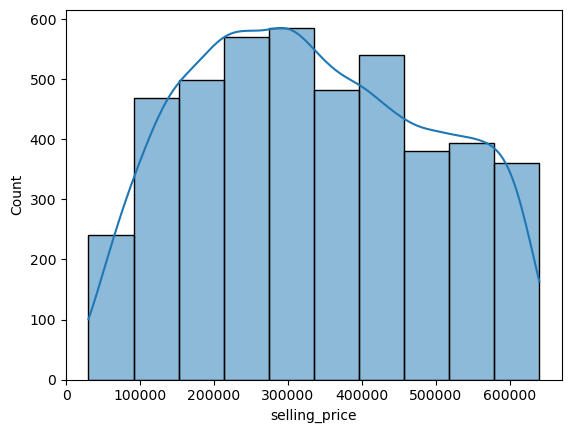

In [137]:
sns.histplot(df_ml_alt['selling_price'],bins=10, kde=True)
plt.show()

In [138]:
df_ml_alt.head()

,year,selling_price,km_driven,mileage,max_power,torque,seats,year8,fuel,seller_type,transmission,owner,name_number,country_number,km_dr_ok
0,2014,450000,145500,234.00,74.00,2000.00,5.00,0,0,0,0,1.00,19,1,0
1,2014,370000,120000,2114.00,10352.00,2500.00,5.00,0,0,0,0,2.00,25,4,0
2,2010,225000,127000,230.00,90.00,2750.00,5.00,0,0,0,0,1.00,10,2,0
3,2007,130000,120000,161.00,882.00,2946.00,5.00,0,1,0,0,1.00,19,1,0
4,2017,440000,45000,2014.00,8186.00,2946.00,5.00,1,1,0,0,1.00,10,2,1


#### Посмотрим на корреляцию данных

In [139]:
df_ml_alt.corr().style.background_gradient(cmap='RdYlGn')

,year,selling_price,km_driven,mileage,max_power,torque,seats,year8,fuel,seller_type,transmission,owner,name_number,country_number,km_dr_ok
year,1.000000,0.674267,-0.312805,0.370051,0.247715,0.137165,0.006272,0.724720,0.030954,0.097469,0.057315,-0.451282,-0.007716,0.021520,0.362809
selling_price,0.674267,1.000000,-0.129528,0.255189,0.294093,-0.042061,0.214112,0.523582,-0.231134,0.145012,0.130863,-0.338176,0.000667,0.119663,0.177043
km_driven,-0.312805,-0.129528,1.000000,-0.117606,-0.081581,-0.247633,0.200498,-0.334394,-0.286492,-0.103629,-0.067061,0.222087,0.064839,0.038229,-0.585297
mileage,0.370051,0.255189,-0.117606,1.000000,0.151979,0.014262,0.020122,0.297987,-0.061656,-0.008372,0.003408,-0.168731,0.206415,0.037856,0.119318
max_power,0.247715,0.294093,-0.081581,0.151979,1.000000,0.052236,-0.066306,0.204793,0.013039,0.086912,0.056268,-0.120366,-0.022249,0.009889,0.099261
torque,0.137165,-0.042061,-0.247633,0.014262,0.052236,1.000000,-0.203194,0.246737,0.619437,0.067988,0.158978,-0.107708,-0.011470,0.083346,0.298758
seats,0.006272,0.214112,0.200498,0.020122,-0.066306,-0.203194,1.000000,-0.063167,-0.304532,-0.060960,-0.031428,0.027626,0.057661,-0.053328,-0.192904
year8,0.724720,0.523582,-0.334394,0.297987,0.204793,0.246737,-0.063167,1.000000,0.170930,0.069768,0.074094,-0.368947,-0.016572,-0.018570,0.400043
fuel,0.030954,-0.231134,-0.286492,-0.061656,0.013039,0.619437,-0.304532,0.170930,1.000000,0.019335,0.094337,-0.067752,-0.140888,-0.079149,0.359543
seller_type,0.097469,0.145012,-0.103629,-0.008372,0.086912,0.067988,-0.060960,0.069768,0.019335,1.000000,0.090387,-0.143417,-0.044815,0.101468,0.162391


Обучим модели

In [140]:
X_alt = df_ml_alt.drop(columns=['selling_price'])
target = df_ml_alt['selling_price']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X_alt, target, test_size = 0.25, random_state = 42)
X_train.shape, X_test.shape

((3392, 14), (1131, 14))

In [142]:
ss = MinMaxScaler()
ss.fit(X_train) # вычислить min, max по каждому столбцу

X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

X_train.head()

,year,km_driven,mileage,max_power,torque,seats,year8,fuel,seller_type,transmission,owner,name_number,country_number,km_dr_ok
0,0.83,0.14,0.08,0.01,0.07,0.10,1.00,0.00,0.00,0.00,0.00,0.32,0.88,0.00
1,0.72,0.14,0.06,0.01,0.29,0.10,0.00,0.00,0.00,0.00,0.33,0.89,0.50,0.00
2,0.86,0.16,0.59,0.01,0.07,0.10,1.00,0.00,0.00,0.00,0.33,0.86,0.38,0.00
3,0.79,0.14,0.06,0.01,0.41,0.10,0.00,0.33,0.00,0.00,0.67,0.36,0.25,0.00
4,0.55,0.14,0.06,0.00,0.43,0.10,0.00,0.33,0.00,0.00,0.00,0.68,0.12,0.00


In [143]:
model = linear_model.LinearRegression()

In [144]:
model.fit(X_train, y_train)

LinearRegression()

In [145]:
predict = model.predict(X_test)

In [146]:
MAE_model = mean_absolute_error(y_test,predict)
MRSE_model = mean_squared_error(y_test, predict)
r2_model = r2_score(y_test, predict)

In [147]:
print("MAE: {0:7.2f}, RMSE: {1:7.2f},  R2: {2:7.2f} for random forest model".format(
       MAE_model, 
       MRSE_model**0.5,
       r2_model))

MAE: 78521.87, RMSE: 97950.13,  R2:    0.60 for random forest model


Видим по метрикам, что качество модели повысилась - модель меньше ошибается

Визуализируем результаты с реальными

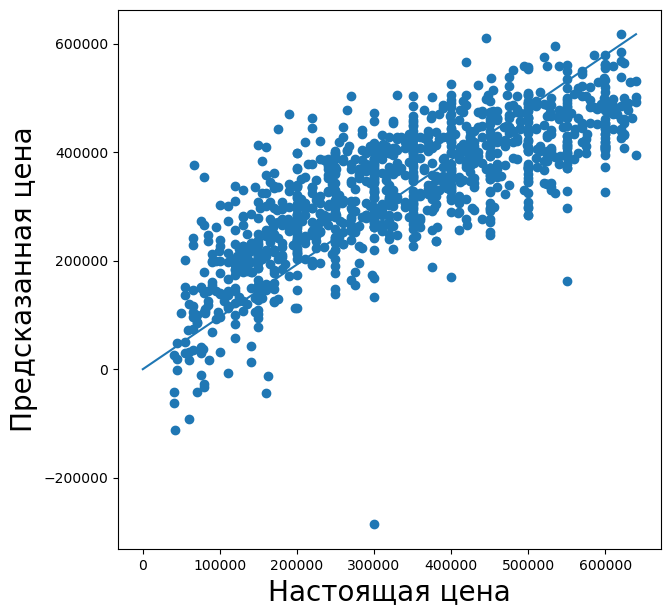

In [148]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, predict) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(y_test)], [0, max(predict)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

Посмотри на веса признаков

In [149]:
importances = pd.DataFrame({'weights': model.coef_[0],
                            'features': X_train.columns}).sort_values(by='weights')
importances

,weights,features
0,589240.78,year
1,589240.78,km_driven
2,589240.78,mileage
3,589240.78,max_power
4,589240.78,torque
5,589240.78,seats
6,589240.78,year8
7,589240.78,fuel
8,589240.78,seller_type
9,589240.78,transmission


Снова все одинаковые!

#### Построим модель случайного леса

In [150]:
model_rf = ensemble.RandomForestRegressor(random_state=123)

In [151]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [152]:
predict_rf = model_rf.predict(X_test)

In [153]:
MAE_model_rf = mean_absolute_error(y_test,predict_rf)
MRSE_model_rf = mean_squared_error(y_test, predict_rf)
r2_model_rf = r2_score(y_test, predict_rf)

In [154]:
print("MAE: {0:7.2f}, RMSE: {1:7.2f},  R2: {2:7.2f} for random forest model".format(
       MAE_model_rf, 
       MRSE_model_rf**0.5,
       r2_model_rf))

MAE: 50557.98, RMSE: 68705.10,  R2:    0.80 for random forest model


Наша модель ошибается еще меньше!

In [155]:
df_ml_alt['selling_price'].describe()

count     4523.00
mean    333882.59
std     158585.87
min      29999.00
25%     200000.00
50%     320000.00
75%     459999.00
max     640000.00
Name: selling_price, dtype: float64

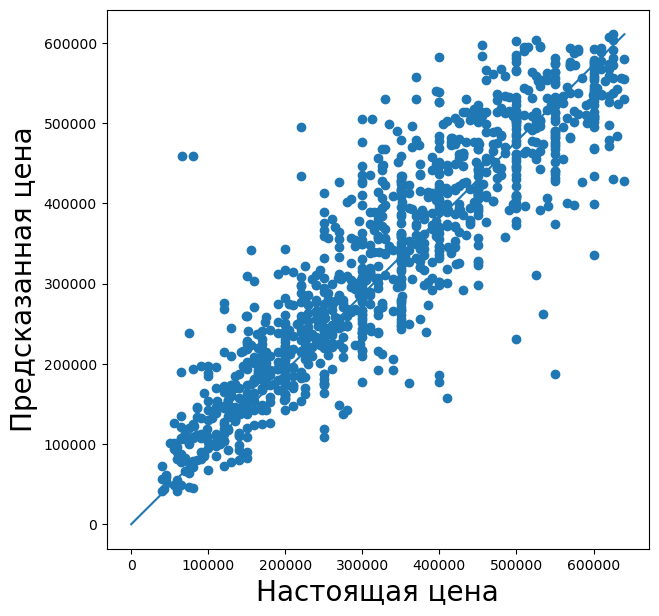

In [156]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, predict_rf) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(y_test)], [0, max(predict_rf)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

Подберем для модели слуйчаного леса лучшие гиперпарметры и после обучим на них нашу модель

In [157]:
model_rf = ensemble.RandomForestRegressor(n_estimators = 100, random_state=123)
parametrs_rf = {'max_depth': range(1,16),
                'min_samples_leaf': range(1,16),
               }

rf_clf = GridSearchCV(model_rf,
                   parametrs_rf,
                   scoring = 'r2',
                   n_jobs=-1,
                   cv=5)
rf_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': range(1, 16),
                         'min_samples_leaf': range(1, 16)},
             scoring='r2')

In [158]:
rf_clf.best_params_

{'max_depth': 12, 'min_samples_leaf': 1}

In [159]:
clf_quality = cross_val_score(rf_clf,
                             X_train,
                             y_train,
                             scoring = 'r2',
                             n_jobs=-1,
                             cv = 5,
                             error_score = 'raise')

In [160]:
clf_quality.mean()

0.8355878422394607

In [161]:
clf_model_rf = ensemble.RandomForestRegressor(n_estimators = 100,
                                              random_state=123,
                                              max_depth = rf_clf.best_params_['max_depth'],
                                              min_samples_leaf = rf_clf.best_params_['min_samples_leaf'])

clf_model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, random_state=123)

In [162]:
predict_m_rf = clf_model_rf.predict(X_test)

In [163]:
MAE_model_rf = mean_absolute_error(y_test,predict_m_rf)
MRSE_model_rf = mean_squared_error(y_test, predict_m_rf)
r2_model_rf = r2_score(y_test, predict_m_rf)

In [164]:
print("MAE: {0:7.2f}, RMSE: {1:7.2f},  R2: {2:7.2f} for random forest model".format(
       MAE_model_rf, 
       MRSE_model_rf**0.5,
       r2_model_rf))

MAE: 49776.41, RMSE: 67766.51,  R2:    0.81 for random forest model


#### Сохраним полученную модель

In [198]:
#import pickle

#with open('model_rf', 'wb') as f:
    #pickle.dump(model, f)

#а так модель можно загрузить из файла:
#with open('model.pickle', 'rb') as f:
   # model = pickle.load(f)

Или так:

In [199]:
import joblib
# СОХРАНЕНИЕ МОДЕЛИ
joblib.dump(model, 'model.pkl')
# ЗАГРУЗКА МОДЕЛИ*
# model = joblib.load('model.pkl')

['model.pkl']

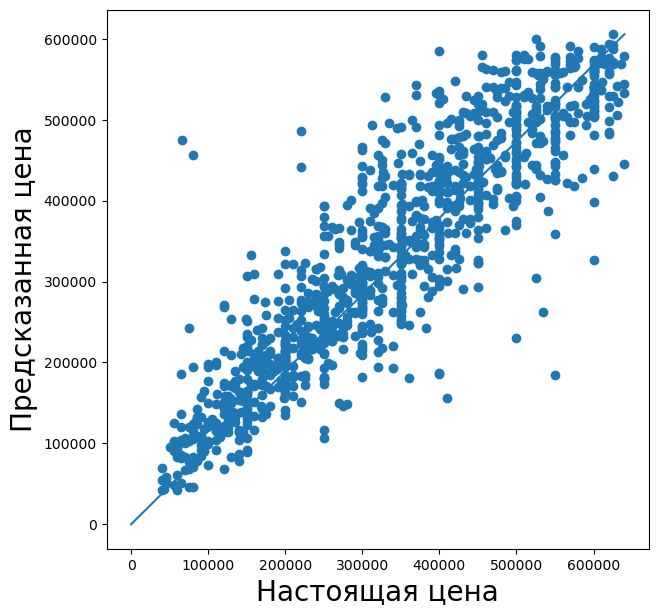

In [166]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, predict_m_rf) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(y_test)], [0, max(predict_m_rf)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

Видим, что результаты улучшились:
- коэффициент детерминации равен 0.81, что означает высокую функциональную силу связи;
- средняя абсолютная ошибка состовляет 49776;
- квадратный корень из средней квадратичной ошибки 67766.

In [201]:
X_train.head()

,year,km_driven,mileage,max_power,torque,seats,year8,fuel,seller_type,transmission,owner,name_number,country_number,km_dr_ok
0,0.83,0.14,0.08,0.01,0.07,0.10,1.00,0.00,0.00,0.00,0.00,0.32,0.88,0.00
1,0.72,0.14,0.06,0.01,0.29,0.10,0.00,0.00,0.00,0.00,0.33,0.89,0.50,0.00
2,0.86,0.16,0.59,0.01,0.07,0.10,1.00,0.00,0.00,0.00,0.33,0.86,0.38,0.00
3,0.79,0.14,0.06,0.01,0.41,0.10,0.00,0.33,0.00,0.00,0.67,0.36,0.25,0.00
4,0.55,0.14,0.06,0.00,0.43,0.10,0.00,0.33,0.00,0.00,0.00,0.68,0.12,0.00
